<a href="https://colab.research.google.com/github/jaisong-sith/my-doc/blob/master/sunrisesunsetTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("htmltab")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’




In [4]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("chron")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(htmltab)
library(tidyverse)
library(chron)
library(lubridate)
library(ggplot2)
library(scales)

In [0]:
province.list <- c("phatthalung", "chiangmai", "ayutthaya", "ubonratchathani",
                   "chachoengsao")

In [0]:
# now there are only data from 2011 to 2019 to creat the year list
year.list <- as.character(2011:2019)

In [0]:
# there are 12 months to create the month list
month.no <- as.character(1:12)

In [0]:
# set the datalist to keep the data in list type
datalist <- list()

In [0]:
#### looping it ####

for (i in 1:length(province.list)) {
  for (j in 1:length(year.list)) {
    for (k in 1:12) {
      # call the web site 
      web <- paste0("http://thaiastro.nectec.or.th/skyevnt/sunmoon/", 
                    year.list[i], "/", province.list[i], ".html")
      
      # extract table from website and select thr column related
      data <- htmltab(web, which = k)[c(-1,-2),c(1, 3, 5)]
      
      # rename the column names from thai to eng
      names(data) <- c("date", "sunrise", "sunset")
      
      # restructure the datatable in the right type
      
      data <- data %>% mutate(location = province.list[i],
                              year = year.list[j],
                              month = month.no[k], 
                              date = c(1:length(data$date)),
                              sunrise = times(paste0(data$sunrise, ":00")),
                              sunset = times(paste0(data$sunset, ":00")),
                              date = as.character(date)
      )
      
      # create new photoperiod variable
      data$photoperiod <-  difftime(strptime(data$sunset, "%H:%M:%S"),
                                    strptime(data$sunrise, "%H:%M:%S"),
                                    units = "hours")%>% as.numeric()
      
      # 
      data$day_month_year <- as.Date(paste0(data$date,"/" ,data$month,"/",
                                            data$year), 
                                     format = "%d/%m/%y")
      
      data$dayofyear <- as.numeric(format(data$day_month_year, "%j"))
      
      datalist[[ ((i-1)*(12*length(year.list))) + (12*(j-1))+k]] <- data  
}
}
}


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



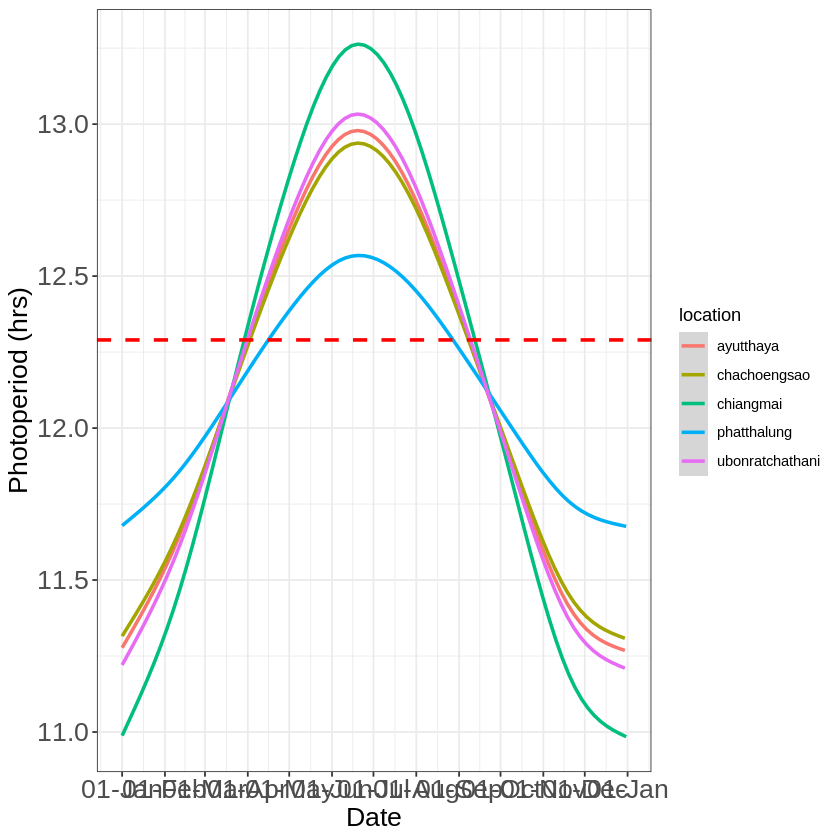

In [29]:
# combind list data
big_data <- do.call(rbind, datalist)

big_data$CommonDate <- as.Date(paste0("2000-",format(big_data$day_month_year,
                                                     "%j")), "%Y-%j")

big_data %>% ggplot(aes(x = CommonDate, y = photoperiod, color = location)) +
#  geom_point() +
#  geom_line() +
  geom_smooth() +
#  facet_grid(location~.) +
  scale_x_date(labels = function(x) format(x, "%d-%b"),
               date_breaks = "1 month") +
  theme_bw() + theme(axis.text = element_text(size = 16),
                     axis.title = element_text(size = 16)) +
  xlab("Date") + ylab("Photoperiod (hrs)") +
  geom_hline(yintercept = 12.29, linetype="dashed", 
             color = "red", size = 1 )
